In [1]:
!git clone https://github.com/kevmo/clothing-dataset-small

fatal: destination path 'clothing-dataset-small' already exists and is not an empty directory.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import tensorflow as ft
from tensorflow import keras

2023-11-16 09:49:20.716709: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
from tensorflow.keras.preprocessing.image import load_img

In [5]:
IMG_TARGET_SIZE = (299, 299)

In [6]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'

fullname = f'{path}/{name}'
img = load_img(fullname, target_size=IMG_TARGET_SIZE)

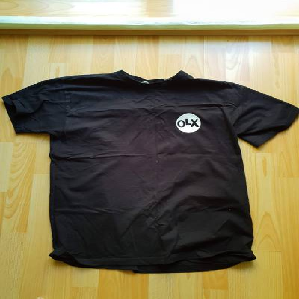

In [7]:
load_img(fullname, target_size=IMG_TARGET_SIZE)

In [8]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x1403312D0>


In [9]:
len(np.array(img)) #RGB

299

In [10]:
img.size

(299, 299)

In [11]:
NP_IMG_SHAPE = np.array(img).shape

NP_IMG_SHAPE

(299, 299, 3)

## Pre-trained Convolutional Neural Network

Keras pretrained models: https://keras.io/api/applications/xception/



In [12]:
from tensorflow.keras.applications.xception import Xception

In [13]:
model = Xception(weights='imagenet', input_shape=NP_IMG_SHAPE)

Test

In [14]:
X = np.array([img])

In [15]:
X.shape

(1, 299, 299, 3)

In [16]:
model.predict(X)

1/1 [==============================] - 1s 969ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e

#### Preprocessing needed

In [17]:
from tensorflow.keras.applications.xception import preprocess_input

In [18]:
X = preprocess_input(X)

In [19]:
pred = model.predict(X)

1/1 [==============================] - 1s 912ms/step


In [20]:
pred

array([[3.23712273e-04, 1.57383824e-04, 2.13493186e-04, 1.52370500e-04,
        2.47626303e-04, 3.05035996e-04, 3.20592080e-04, 1.47499290e-04,
        2.03621836e-04, 1.49272411e-04, 1.95662913e-04, 2.10137368e-04,
        7.59264221e-05, 1.13972201e-04, 1.62683515e-04, 2.04638607e-04,
        1.97415953e-04, 1.44288730e-04, 1.40217497e-04, 1.73685956e-04,
        7.46690319e-04, 2.56966770e-04, 2.66808725e-04, 2.96514336e-04,
        3.73602292e-04, 2.77404353e-04, 2.16571032e-04, 2.27270095e-04,
        3.80813086e-04, 1.72165936e-04, 3.05401161e-04, 1.96431327e-04,
        3.92115355e-04, 4.78071626e-04, 2.91751436e-04, 3.25693341e-04,
        1.47395229e-04, 1.62362063e-04, 2.12710744e-04, 1.34028378e-04,
        2.40070483e-04, 6.75211835e-04, 2.54943559e-04, 1.44478763e-04,
        4.12821304e-04, 2.04408629e-04, 3.02958331e-04, 1.49339627e-04,
        1.99653718e-04, 2.27005847e-04, 2.93729419e-04, 2.27444660e-04,
        6.37644320e-04, 7.82615738e-04, 2.49557401e-04, 4.052706

In [21]:
from tensorflow.keras.applications.xception import decode_predictions

In [22]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.6819632),
  ('n02916936', 'bulletproof_vest', 0.038140047),
  ('n04370456', 'sweatshirt', 0.03432475),
  ('n03710637', 'maillot', 0.011354216),
  ('n04525038', 'velvet', 0.0018453621)]]

## Transfer Learning

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
train_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

In [25]:
train_ds = train_generator.flow_from_directory(
    './clothing-dataset-small/train', 
    target_size=(150,150), 
    batch_size=32
)


Found 3068 images belonging to 10 classes.


In [26]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [27]:
!ls -l clothing-dataset-small/train

total 0
drwxr-xr-x  243 home  staff   7776 Nov 14 14:02 dress
drwxr-xr-x  125 home  staff   4000 Nov 14 14:02 hat
drwxr-xr-x  457 home  staff  14624 Nov 14 14:02 longsleeve
drwxr-xr-x  186 home  staff   5952 Nov 14 14:02 outwear
drwxr-xr-x  470 home  staff  15040 Nov 14 14:02 pants
drwxr-xr-x  292 home  staff   9344 Nov 14 14:02 shirt
drwxr-xr-x  200 home  staff   6400 Nov 14 14:02 shoes
drwxr-xr-x  204 home  staff   6528 Nov 14 14:02 shorts
drwxr-xr-x  114 home  staff   3648 Nov 14 14:02 skirt
drwxr-xr-x  797 home  staff  25504 Nov 14 14:02 t-shirt


In [28]:
import scipy

x, Y = next(train_ds)

In [30]:
x[0]

array([[[ 0.8117647 , -0.67058825, -0.827451  ],
        [ 0.8352941 , -0.64705884, -0.8039216 ],
        [ 0.84313726, -0.6392157 , -0.79607844],
        ...,
        [ 0.4666667 , -0.8509804 , -0.85882354],
        [ 0.4039216 , -0.92156863, -0.94509804],
        [ 0.427451  , -0.92156863, -0.9372549 ]],

       [[ 0.8117647 , -0.67058825, -0.827451  ],
        [ 0.8352941 , -0.64705884, -0.8039216 ],
        [ 0.84313726, -0.6392157 , -0.79607844],
        ...,
        [ 0.70980394, -0.654902  , -0.7254902 ],
        [ 0.75686276, -0.6313726 , -0.69411767],
        [ 0.7647059 , -0.6392157 , -0.69411767]],

       [[ 0.827451  , -0.654902  , -0.8117647 ],
        [ 0.8509804 , -0.6313726 , -0.7882353 ],
        [ 0.8352941 , -0.64705884, -0.8039216 ],
        ...,
        [ 0.77254903, -0.64705884, -0.73333335],
        [ 0.75686276, -0.67058825, -0.75686276],
        [ 0.79607844, -0.6313726 , -0.73333335]],

       ...,

       [[ 0.4039216 , -0.84313726, -0.8745098 ],
        [ 0

In [31]:
X, y = next(train_ds)

In [32]:
X[0]

array([[[-0.1372549 , -0.17647058, -0.2235294 ],
        [-0.11372548, -0.15294117, -0.19999999],
        [-0.10588235, -0.14509803, -0.19215685],
        ...,
        [ 0.35686278,  0.35686278,  0.2941177 ],
        [ 0.35686278,  0.35686278,  0.2941177 ],
        [ 0.35686278,  0.35686278,  0.2941177 ]],

       [[-0.12156862, -0.1607843 , -0.20784312],
        [-0.10588235, -0.14509803, -0.19215685],
        [-0.09019607, -0.12941176, -0.17647058],
        ...,
        [ 0.37254906,  0.37254906,  0.30980396],
        [ 0.37254906,  0.37254906,  0.30980396],
        [ 0.37254906,  0.37254906,  0.30980396]],

       [[-0.11372548, -0.15294117, -0.19999999],
        [-0.09803921, -0.1372549 , -0.18431371],
        [-0.09019607, -0.12941176, -0.17647058],
        ...,
        [ 0.38823533,  0.38823533,  0.32549024],
        [ 0.38823533,  0.38823533,  0.32549024],
        [ 0.38823533,  0.38823533,  0.32549024]],

       ...,

       [[-0.01960784, -0.02745098, -0.05882353],
        [-0

In [36]:
y[:4] # one hot encoding

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

#### Validate

In [37]:
validation_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

In [40]:
val_ds = validation_generator.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32
)

Found 341 images belonging to 10 classes.


In [43]:
# only include convolutional layers, not dense layers (exclude top)
base_model = Xception(
    weights="imagenet", 
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False


In [48]:
# Create a new top

inputs = keras.Input(shape=(150, 150, 3)) 

base = base_model(inputs)

outputs = base

model = keras.Model(inputs, outputs)

In [49]:
preds = model.predict(X)

1/1 [==============================] - 2s 2s/step
